<a href="https://colab.research.google.com/github/abm4github/IITM_programmingDataStructures_CodingRound/blob/main/KruskalsAlgo_DiggingRoads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A contractor is asked to keep the roads minimum and dig out extra roads, if any, such that even after the dig out process, there should still exist the connectivity. 

The contractor, is ill minded, in order to maximise his profit percentage want to dig away the road which takes maximum time (in months) to dig out.

consider following graph, he might have digged the road between 0 and 1 or 1 and 2, but he opted road between 0 and 3 as it yields maximum profit as he get work of 5 months.

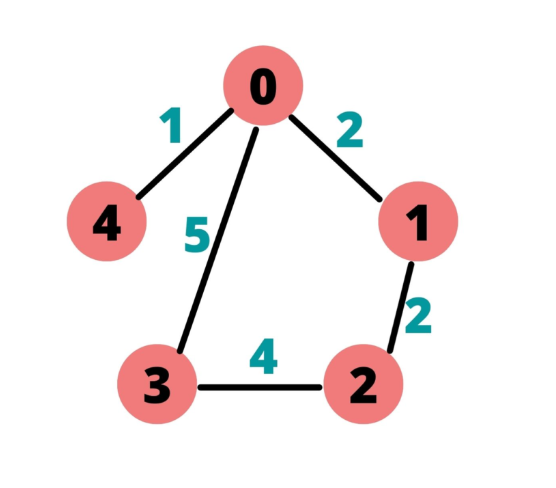

if you are happen to be that ill minded contractor, how would you calculate the total possible maximum time for which you could be engaged in digging?

In [11]:
def KruskalsAlgoDigging(D):
  components = {} 
  requiredEdges = [] # this gives all the roads that are minimum and should remain undigged in order to maintain the connectivity 

  # converting the given dictionary as list of tuples of format (w,s,d), weight source destination
  # keeping weight in the begining, ease me in sorting them as per weights
  tupleList = []
  for source in D.keys():
    for (destination,weight) in D[source]:
      if (weight, source, destination) not in tupleList and (weight, destination, source) not in tupleList:   # above if condition helps us to avoid duplicates like (1,0,4) and (1,4,0) which are same ie. road between 0 and 4
        tupleList.append((weight, source, destination))   # dont forget double braces # now we got a list having its elements like (weight, source, destination)
    
    components[source] = source

  tupleList.sort()  # lowest weight elements comes to the beginning 


  for (w, s, d) in tupleList:
    if components[s] != components[d]:  # this condition is necessary to avoid looping like if we got edges (A,B) and (B,C) we cannot take (C,A) as it forms triangular loop
      requiredEdges.append((s,d)) # dont forget double braces

      c = components[s]   # components are used to group up things and segregate various groups      
      for comp in components:
        if components[comp] == c: # (s,d) are added to our requiredEdges list which means they along with previous associates are of same group (selectively, d's group) now   
          components[comp] = components[d]   # we can simply say that all the group c members are now joined in d group, this is done to avoid looping

  print("ReuiredEdges",requiredEdges) # if it has been just kruskal we might have returned requiredEdges

  # but story yet continues, we need to keep these roads safe and dig out remaining, i.e. (total roads - roads in requiredEdges) and find time required to dig them

  digEdges = []
  time = 0

  for (w, s, d) in tupleList:
    if (s,d) not in requiredEdges:
      digEdges.append((s,d))
      time += w
  
  
  print("roads that can be digged", digEdges)
  return f"Total time needed to dig unwanted roads: {time} months"


D = {0:[(4,1),(1,2),(3,5)], 1:[(0,2),(2,2)], 2:[(1,2),(3,4)], 3:[(0,5),(2,4)], 4:[(0,1)]}  # format {sorce(s): [(destination1(d), weight1(s)), (destination2, weight2)]}
KruskalsAlgoDigging(D)

ReuiredEdges [(0, 4), (0, 1), (1, 2), (2, 3)]
roads that can be digged [(0, 3)]


'Total time needed to dig unwanted roads: 5 months'